In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import glob

glob.glob("./input/*")

['./input\\sample_submission.csv', './input\\test.csv', './input\\train.csv']

## データの中身を覗いてみる

In [3]:
df=pd.read_csv("./input/train.csv")

df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
len(df)

42000

## labelの値を別に取り分けて、他を画像データの配列として格納

In [5]:
labels=df["label"].values
df.drop("label", axis=1, inplace=True)
pixels=df.values

pixels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [6]:
type(pixels)

numpy.ndarray

In [7]:
len(pixels)

42000

In [8]:
len(pixels[0])

784

**28×28=784の配列であると確認**

In [9]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

#### グレースケールのはずなので最大値を確認

In [10]:
max(pixels[0])

255

## PILに渡す画像配列の形に成形した後、実際に画像を表示してみる

In [11]:
pixels=pixels/255
pixels=pixels.reshape(len(df),28,28)

pixels

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [12]:
len(pixels[0][0])

28

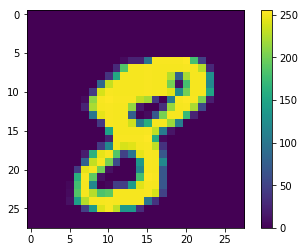

In [13]:
img=Image.fromarray(np.uint8(pixels[10]*255))

plt.imshow(img)
plt.colorbar()

In [14]:
#入力に必要な4次元配列に変換
pixels=pixels.reshape(len(df),28,28,1)

## 一方で縦方向と横方向に有色ピクセルの数分布を取ってみる

In [15]:
distribution=np.zeros((len(df), 2, 28))

for i in range(len(df)):
    for j in range(28):
        for k in range(28):
            if(pixels[i][j][k]>0):
                distribution[i][0][k]+=1.0
                distribution[i][1][j]+=1.0
    
    distribution[i][0]=distribution[i][0]/max(distribution[i][0])
    distribution[i][1]=distribution[i][1]/max(distribution[i][1])

print(distribution[1][0])

[0.         0.         0.         0.         0.15789474 0.47368421
 0.63157895 0.78947368 0.94736842 1.         0.73684211 0.63157895
 0.57894737 0.57894737 0.52631579 0.57894737 0.57894737 0.68421053
 0.78947368 0.89473684 0.84210526 0.73684211 0.47368421 0.26315789
 0.         0.         0.         0.        ]


**なにか面白そうな特徴がある**

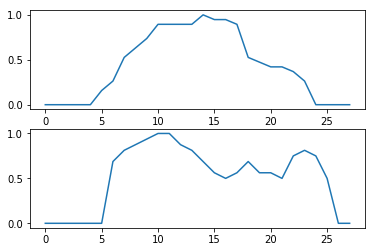

In [16]:
plt.subplot(2,1,1)
plt.plot(distribution[10][0])
plt.subplot(2,1,2)
plt.plot(distribution[10][1])

In [17]:
#labels=keras.utils.np_utils.to_categorical(labels, 10)

In [18]:
labels

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [19]:
df_test=pd.read_csv("./input/test.csv")

pixels_test=df_test.values

pixels_test=pixels_test/255
pixels_test=pixels_test.reshape(len(df_test),28,28,1)


distribution_test=np.zeros((len(df_test), 2, 28))

for i in range(len(df_test)):
    for j in range(28):
        for k in range(28):
            if(pixels[i][j][k]>0):
                distribution_test[i][0][k]+=1.0
                distribution_test[i][1][j]+=1.0
    
    distribution_test[i][0]=distribution_test[i][0]/max(distribution_test[i][0])
    distribution_test[i][1]=distribution_test[i][1]/max(distribution_test[i][1])

---
# 以上の2つのデータを用いてCNNを組んでみる

In [20]:
import keras
import tensorflow as tf

Using TensorFlow backend.


In [25]:
input_cnn=keras.layers.Input(shape=(28, 28, 1))
model_cnn=keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu,)(input_cnn)
model_cnn=keras.layers.Conv2D(64, (3, 3), padding="same", activation=tf.nn.relu,)(model_cnn)
model_cnn=keras.layers.MaxPooling2D(pool_size=(2,2))(model_cnn)
model_cnn=keras.layers.BatchNormalization()(model_cnn)

model_cnn=keras.layers.Conv2D(128, (3, 3), padding="same", activation=tf.nn.relu)(model_cnn)
model_cnn=keras.layers.Conv2D(128, (3, 3), padding="same", activation=tf.nn.relu,)(model_cnn)
model_cnn=keras.layers.MaxPooling2D(pool_size=(2,2))(model_cnn)
model_cnn=keras.layers.BatchNormalization()(model_cnn)

model_cnn=keras.layers.Conv2D(512, (3, 3), padding="same", activation=tf.nn.relu)(model_cnn)
model_cnn=keras.layers.Conv2D(512, (3, 3), padding="same", activation=tf.nn.relu,)(model_cnn)
model_cnn=keras.layers.MaxPooling2D(pool_size=(2,2))(model_cnn)
model_cnn=keras.layers.BatchNormalization()(model_cnn)
model_cnn=keras.layers.Dropout(0.1)(model_cnn)

model_cnn=keras.layers.Flatten()(model_cnn)
model_cnn=keras.layers.Dense(512, activation=tf.nn.relu)(model_cnn) #input distribution
model_cnn=keras.layers.Dense(256, activation=tf.nn.relu)(model_cnn)


input_distribution=keras.layers.Input(shape=(2, 28))
model_distribution=keras.layers.Dense(128, activation=tf.nn.relu)(input_distribution)
model_distribution=keras.layers.Dense(128)(model_distribution)
model_distribution=keras.layers.Flatten()(model_distribution)

model_out=keras.layers.concatenate([model_cnn, model_distribution])
model_out=keras.layers.Dense(256, activation=tf.nn.relu)(model_out)
model_out=keras.layers.Dense(128, activation=tf.nn.relu)(model_out)
model_out=keras.layers.Dense(10, activation="softmax")(model_out)

model=keras.models.Model(inputs=[input_cnn, input_distribution], output=model_out)


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


G:\Program Files (x86)\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("de...)`


In [26]:
model.compile(optimizer=tf.train.AdadeltaOptimizer(), loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_11 (Conv2D)              (None, 28, 28, 64)   640         input_4[0][0]                    
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 28, 28, 64)   36928       conv2d_11[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 14, 14, 64)   0           conv2d_12[0][0]                  
__________________________________________________________________________________________________
batch_norm

In [23]:
fit=model.fit([pixels, distribution],labels,epochs=15,validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 33600 samples, validate on 8400 samples
Epoch 1/15
 7744/33600 [=====>........................] - ETA: 6:22 - loss: 2.4052 - acc: 0.1063

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.plot(fit.history["loss"], label="loss")
plt.plot(fit.history["val_loss"], label="val_loss")
plt.subplot(1,2,2)
plt.plot(fit.history["acc"], label="acc")
plt.plot(fit.history["val_acc"], label="val_acc")

In [ ]:
test_loss, test_acc = model.evaluate([pixels, distribution], labels)

print("Test_accuracy:", test_acc)

# テストデータを予測する

In [ ]:
data=model.predict([pixels_test, distribution_test])

In [ ]:
number_prediction=np.array([])

for i in range(len(data)):
    number_prediction=np.append(number_prediction, np.argmax(data[i]))
    
number_prediction=number_prediction.astype(np.int64)
    
number_prediction

# 出力

In [ ]:
df_out_view=pd.read_csv("./input/test.csv", nrows=10)

df_out_view

In [ ]:
ImgId=np.array([i+1 for i in range(len(number_prediction))])

dic={"ImageId":ImgId, "label":number_prediction}

df_out=pd.DataFrame(dic)

df_out

In [ ]:
df_out.to_csv("./output/submission.csv", index=False)